# Explore here
## Solucion del EDA para datos New York Airbnb

### Paso 1: Carga de datos

In [2]:
# Carga de las librerias de interes
import pandas as pd

# carga de la informacion
data_total = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

# visualizacion de la data
data_total.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data_total.to_csv("../data/raw/total_data.csv", index = False)

### Paso 2: Procederemos con exploración y limpieza de los datos

In [4]:
# Veamos cual es la dimension de la informacion 
data_total.shape

(48895, 16)

El resultado anterior nos dice que el dataframe cargado contiene 48.895 registros (numero total de filas) y 16 variables (numero total de columnas).

In [5]:
# Vizualizaremos ahora información sobre los tipos de datos y valores no nulos
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

El resultado anterior revela que: tenemos algunos registros NaN, se destacan las columnas `last_review` y `reviews_per_month`.

En relacion a los datos, se observa que:

- Hay ocho (8) variables del tipo categoricas, estas son:
     (`id`, `name`, `host_id`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `availability_365`)
- Hay ocho (8) variables del tipo numericas, estas son: 
    (`latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `last_review`, `reviews_per_month`, `calculated_host_listings_count`)


##### En este sentido, procedamos a eliminar las duplicaciones

In [6]:
print(f"El número de registros de nombres duplicados es: {data_total['name'].duplicated().sum()}")
print(f"La cantidad de registros de ID de host duplicados es: {data_total['host_id'].duplicated().sum()}")
print(f"El número de registros de identificación duplicados es: {data_total['id'].duplicated().sum()}")

El número de registros de nombres duplicados es: 989
La cantidad de registros de ID de host duplicados es: 11438
El número de registros de identificación duplicados es: 0


Lo anterior revela que:

- `name` tiene valores duplicados, ya que las personas pueden escribir los mismos nombres
- `host_id` puede tener duplicados, porque algunos dueños pueden tener varios Airbnb registrados.
- Hay 0 `id` duplicados, lo que significa que todos son registros únicos.

#### Ahora procederemos a eliminar aquella información que no aporte al analisis

In [7]:
data_total.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

# visualicemos como quedo la data
data_total.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Con esto realizado procedemos con:

### Paso 3: Análisis estadistico univariado

Para ello comenzaremos con:

#### Análisis de variables categóricas

Visualicemos en primera instancia el grafico de sus distribuciones empiricas, esto es posible mediante los histogramas


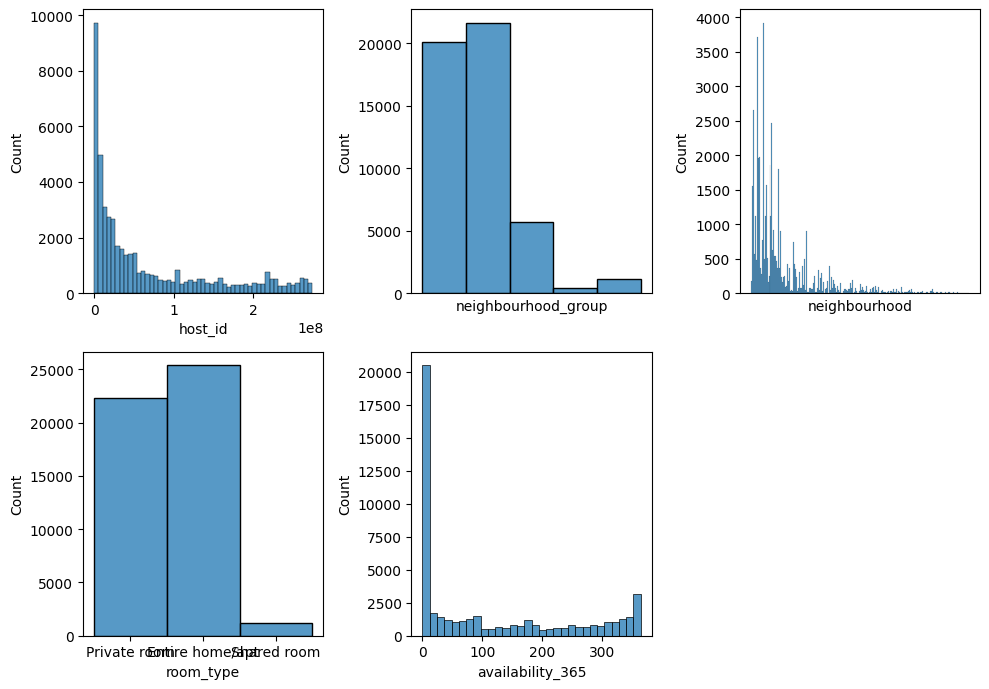

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Creacion del Histograma
sns.histplot(ax = axis[0,0], data = data_total, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_total, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data_total, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data_total, x = "room_type")
sns.histplot(ax = axis[1,1], data = data_total, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjuste del diseño
plt.tight_layout()

# Mostrar el grafico
plt.show()

Los histogramas revelan lo siguiente:

* Algunos anfitriones poseen muchas habitaciones con el fin alquilar. Y hay muchos valores ausentes del tipo "NaN" para "host_id".

* Se disponen de cinco (5) localidades, estas son: Brooklyn, Manhattan, Queens, Staten Island y el Bronx; Estas cinco (5) localidades, refleja que la geografia que estamos estudiando esta ubicada en Nueva York.

* Se evidencia que hay localidades que presentan mas ofertas para habitaciones Airbnb que otras.

* Se aprecian más propiedades (entre casas y apartamentos) disponibles para alquilar contra las habitaciones (del tipo privadas y compartidas).

* La gran mayoria de las habitaciones están disponibles todo el año. Sin embargo, el conjunto de datos posee muchos valores ausentes del tipo 0/NaN para la categoría. Esto podria ser un error en la recoleccion de la informacion o ausencia de la misma.


Procedamos ahora con el

#### Análisis de variables numéricas.

Para ello, visualicemos en primera instancia el grafico de sus distribuciones empiricas, esto es posible mediante los histogramas

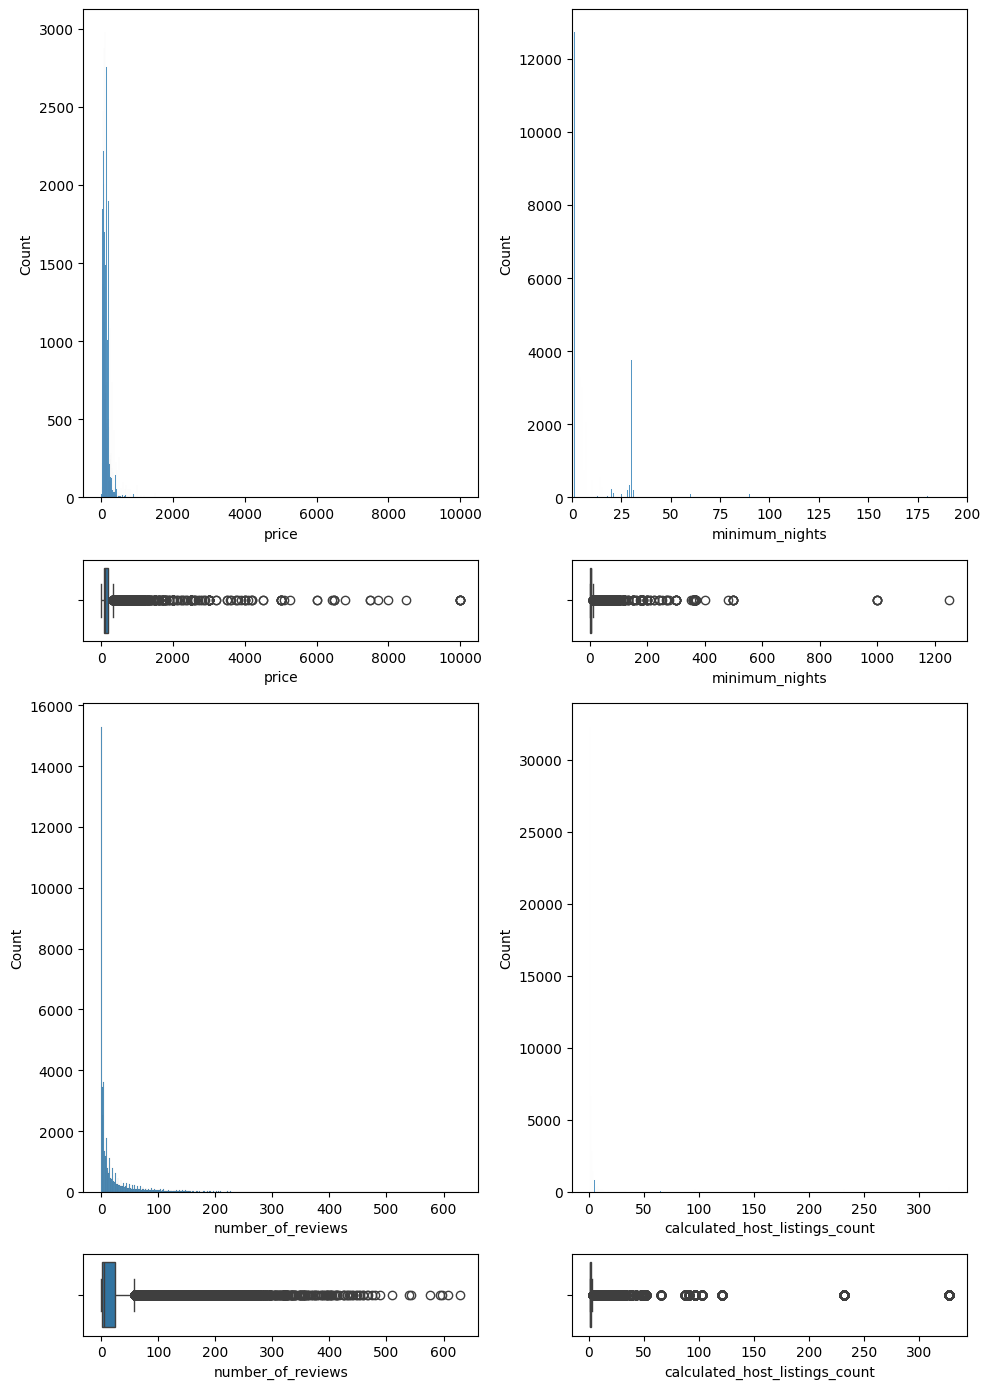

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data_total, x = "price")
sns.boxplot(ax = axis[1, 0], data = data_total, x = "price")

sns.histplot(ax = axis[0, 1], data = data_total, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data_total, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data_total, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data_total, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data_total, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data_total, x = "calculated_host_listings_count")

# Adjustar el diseño
plt.tight_layout()

# Mostrar el grafico
plt.show()

Ahora procedamos al 

### Paso 4: Analisis multivariante de la informacion 

comenzaremos con las posibles combinaciones de datos, las cuales son:
* datos numericos contra datos numericos
* datos categoricos contra datos categoricos
* datos numericos contra datos categoricos    
* Todas las observaciones de forma simultanea

#### Analisis de datos numericos

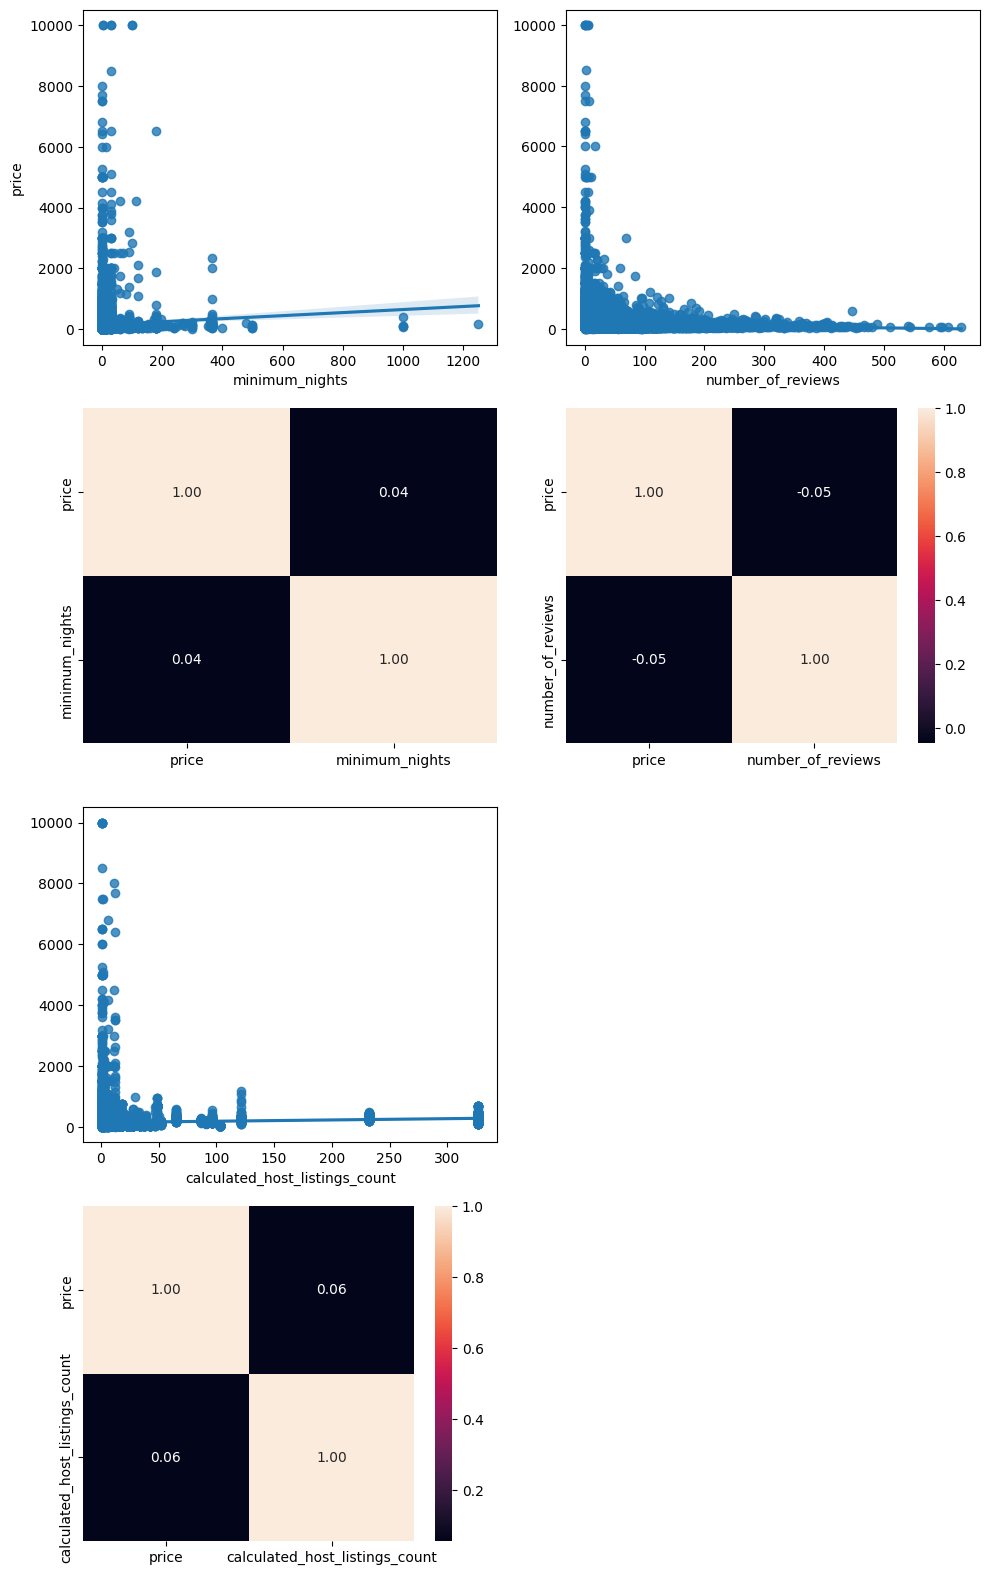

In [10]:
# Analisis de datos numericos 

# Creamnos un subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Creamos un Plates 
sns.regplot(ax = axis[0, 0], data = data_total, x = "minimum_nights", y = "price")

sns.heatmap(data_total[["price", "minimum_nights"]].corr(), annot = True, 
            fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data_total, x = "number_of_reviews", y = "price").set(ylabel = None)

sns.heatmap(data_total[["price", "number_of_reviews"]].corr(), 
            annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data_total, 
            x = "calculated_host_listings_count", y = "price").set(ylabel = None)

sns.heatmap(data_total[["price", "calculated_host_listings_count"]].corr(), 
            annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjuste del diseño
plt.tight_layout()

# Mostrar el grafico
plt.show()

Si observamos los graficos de dispersion y las, vemos que por graficas de la correlacion se puede afirmar que:

* No se existe una relacion lineal entre la variable precio y la variable numero minimo de noches.
* No existe una relacion lineal entre la variable numero de reseñas y la variable precio.

Procedamos con el analisis de 


#### Analisis de datos categoricos

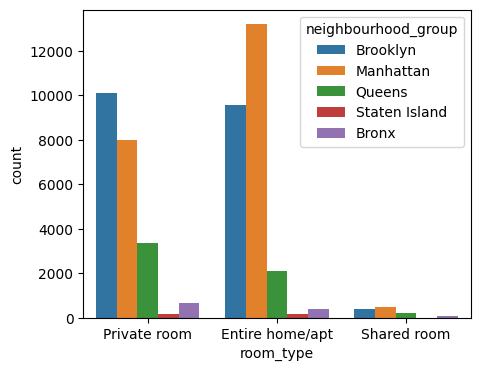

In [11]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data_total, x = "room_type", hue = "neighbourhood_group")

# Mostrar el grafico
plt.show()

De las graficas de los datos categorico podemos señalar que:

* Manhattan es la localidad con mas lugares para alquilar, y el que tiene mas casas privadas(no compartidas) para alquilar.

* Brooklyn es la segunda localidad mas grande en alquiler, esta tiene mas habitaciones privadas (no compartidas), lo que significa que probablemente mas personas pueden comparten su casa.

* Queens y Bronx serian la 3er y 4to localidad respecto a su tamaño para alquilar y comparten el mismo principio que Brooklyn.

* Staten no es representativo para los Airbnb.

No existe una relacion fuerte entre el tipo de habitacion y el vecindario.

Ahora procedamos a realizar el 

#### Analisis de datos numerico contra categorico (todos a la vez)

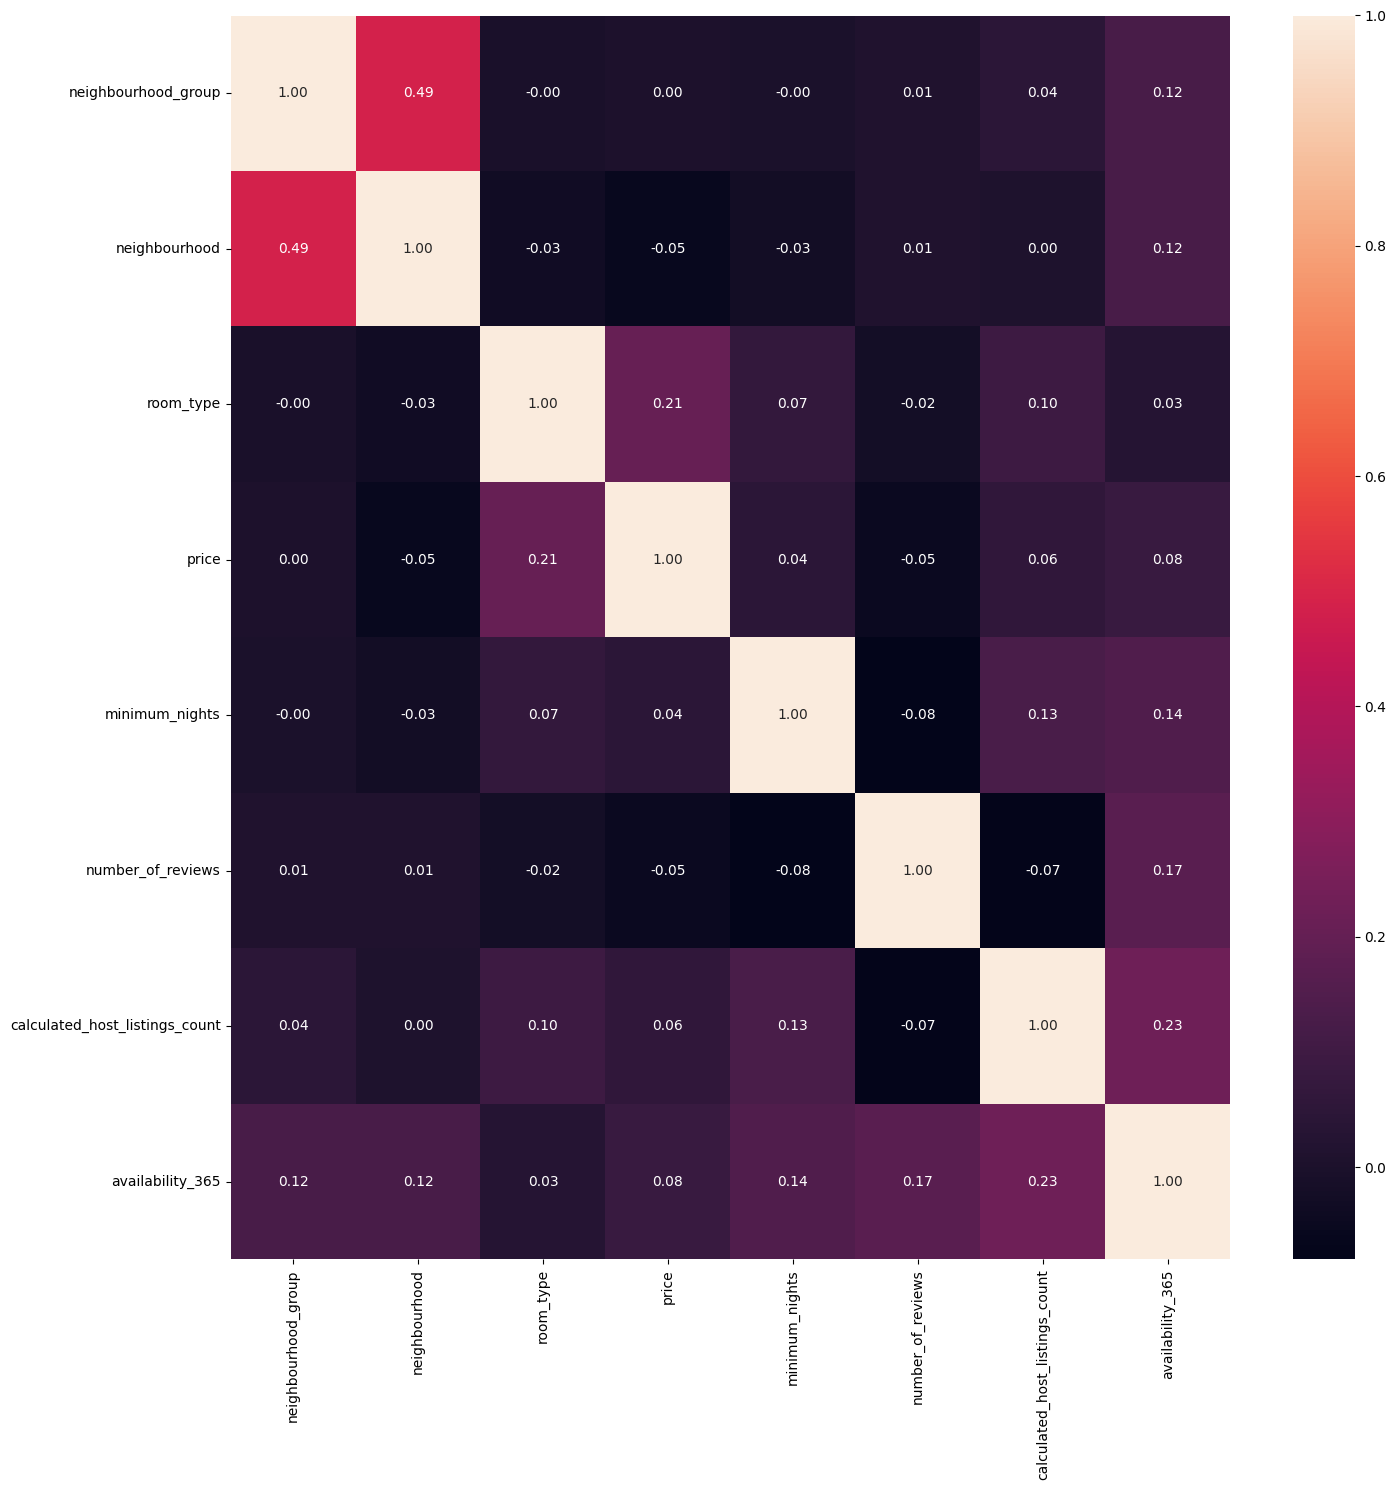

In [12]:
# Factorizar los datos: habitación y vecindario

data_total["room_type"] = pd.factorize(data_total["room_type"])[0]
data_total["neighbourhood_group"] = pd.factorize(data_total["neighbourhood_group"])[0]
data_total["neighbourhood"] = pd.factorize(data_total["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data_total[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", 
                        "availability_365"]].corr(), annot = True, fmt = ".2f")

# Adjuste del diseño
plt.tight_layout()

# Mostrar el grafico
plt.show()

Al observar los datos se aprecia la presencia de una correlación muy baja entre todos los datos. 
Por lo que, a lo sumo:

* Los anfitriones con mas anuncios tienden a tener mas disponibilidad.

Aparte de esto, no podemos suministrar una conclusion o relacion entre las variables.

Ahora procedamos a realizar

### Analisis de todos datos a la vez

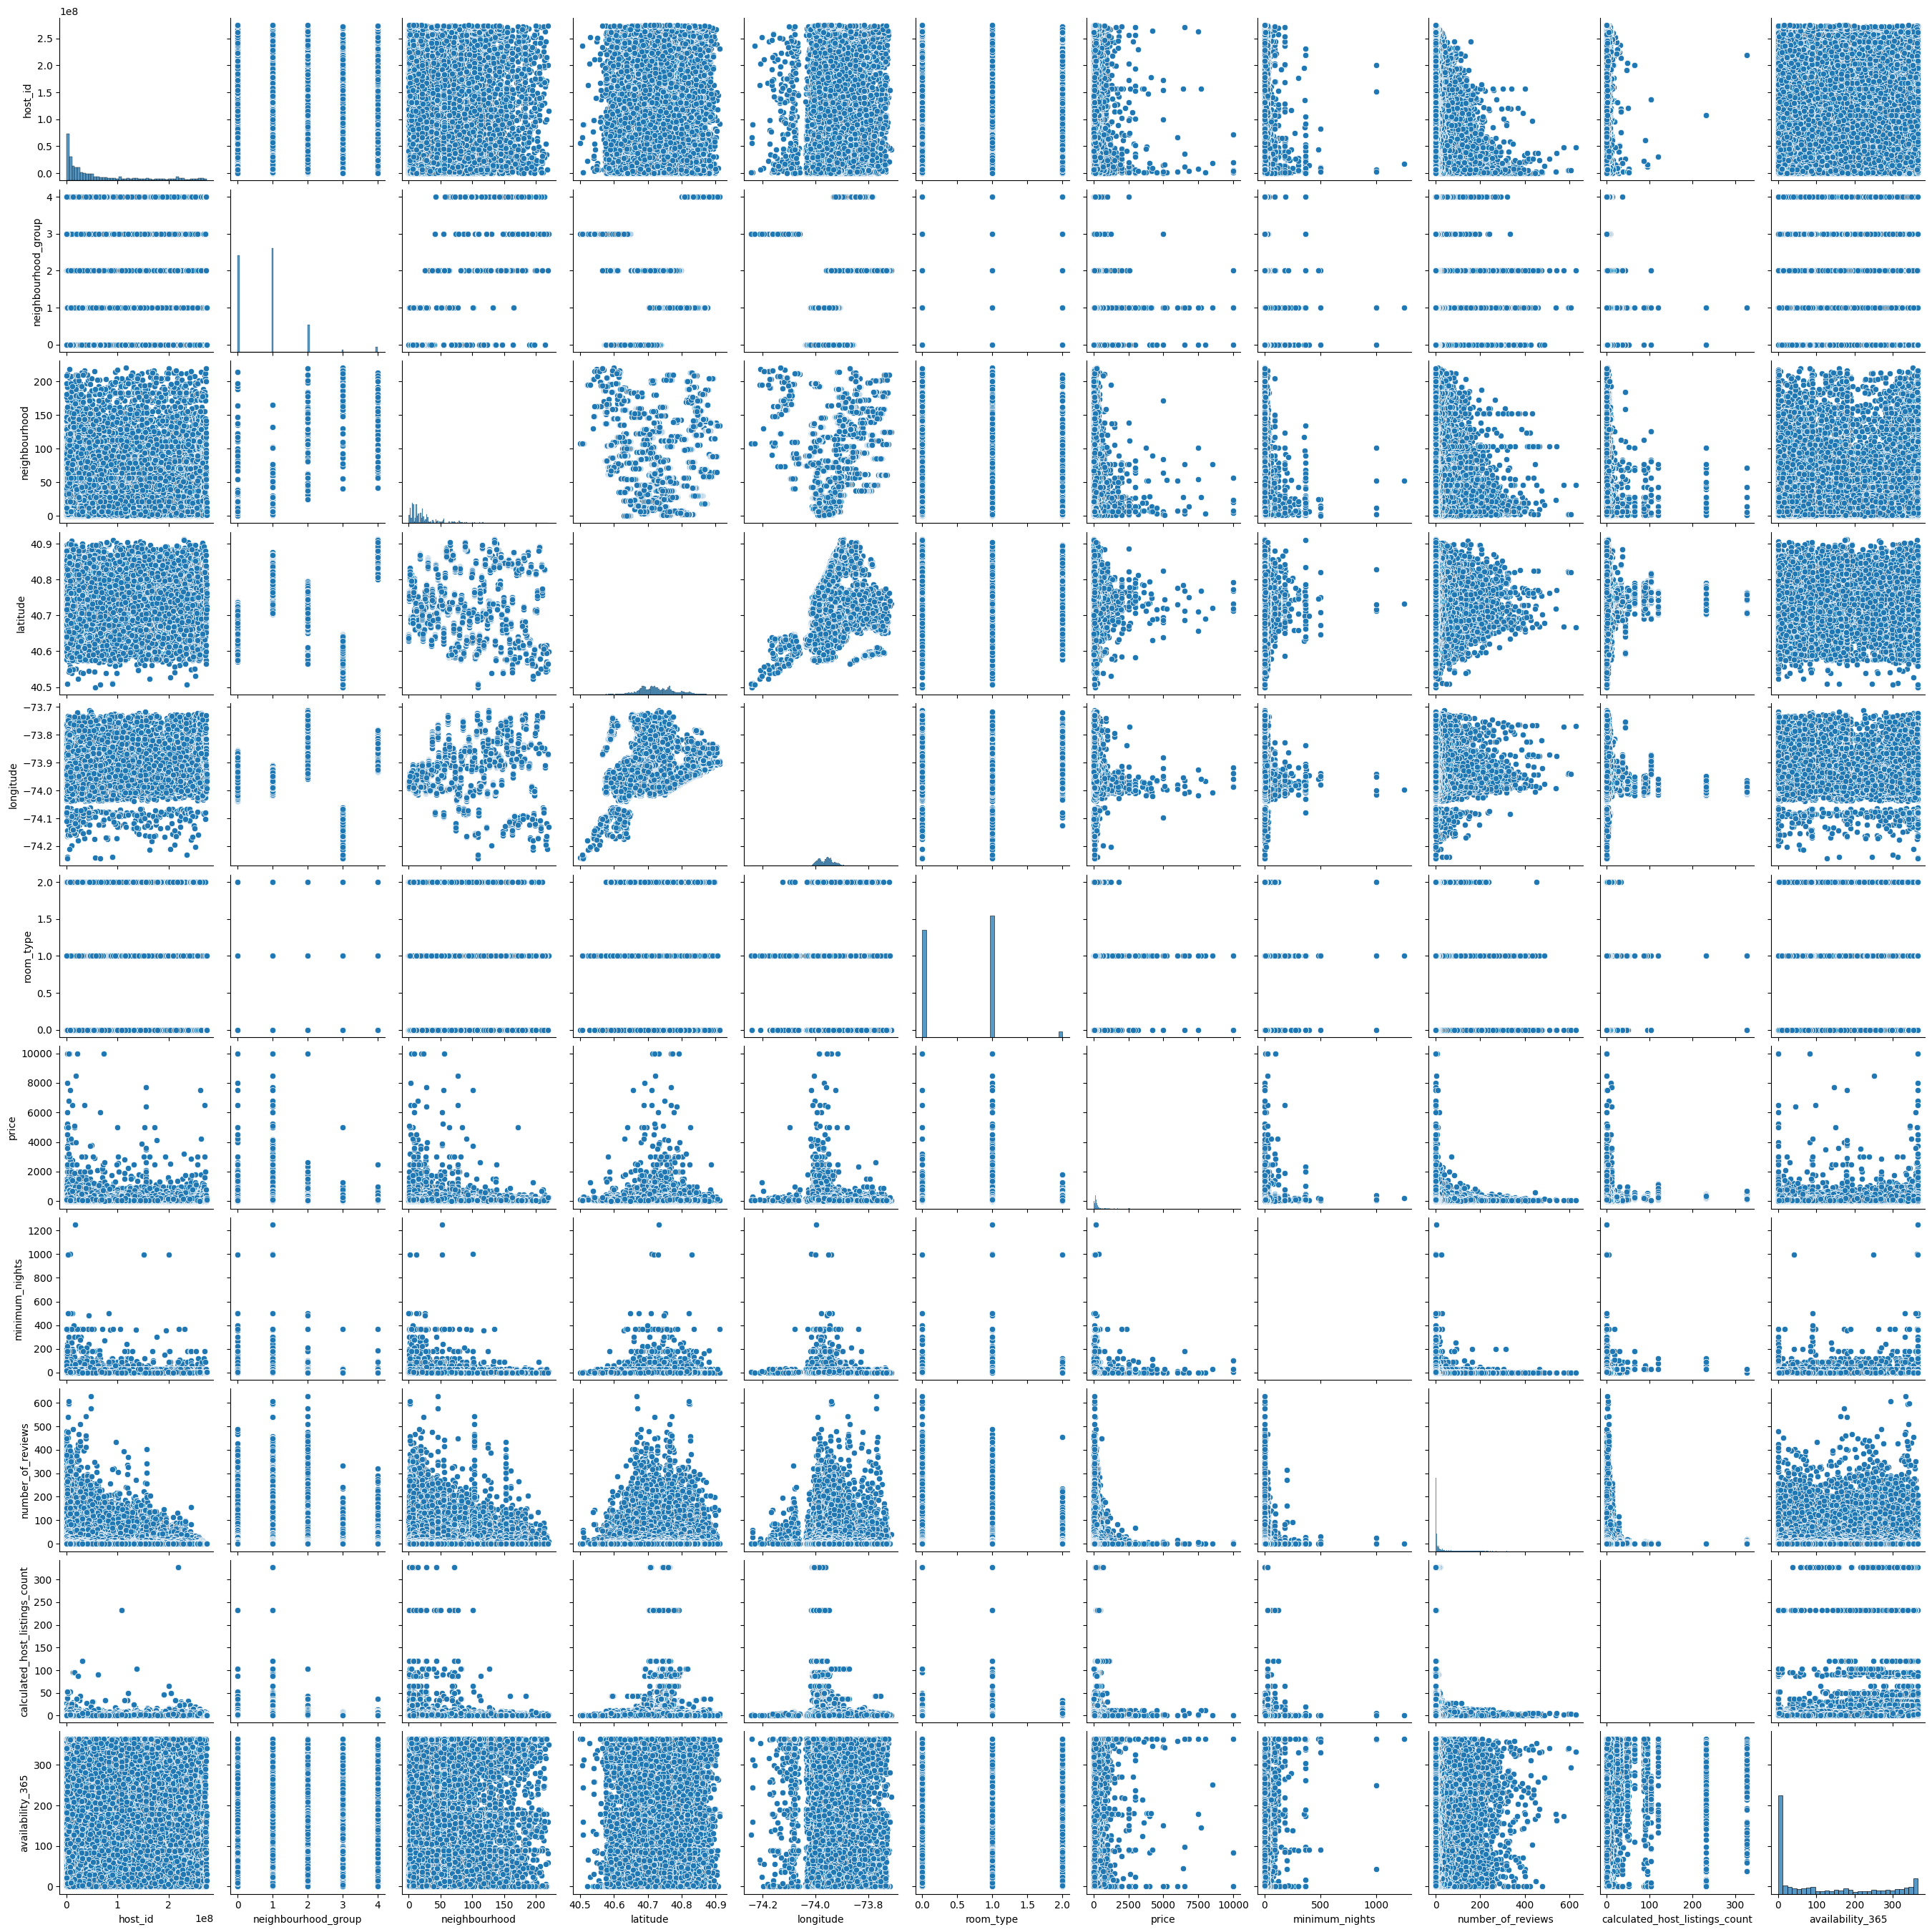

In [13]:
sns.pairplot(data = data_total)

Ahora procederemos al 

### Paso 5: Ingenieria de caracteristicas/funciones

#### Realicemos el estudio de los valores atipicos

In [14]:
data_total.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


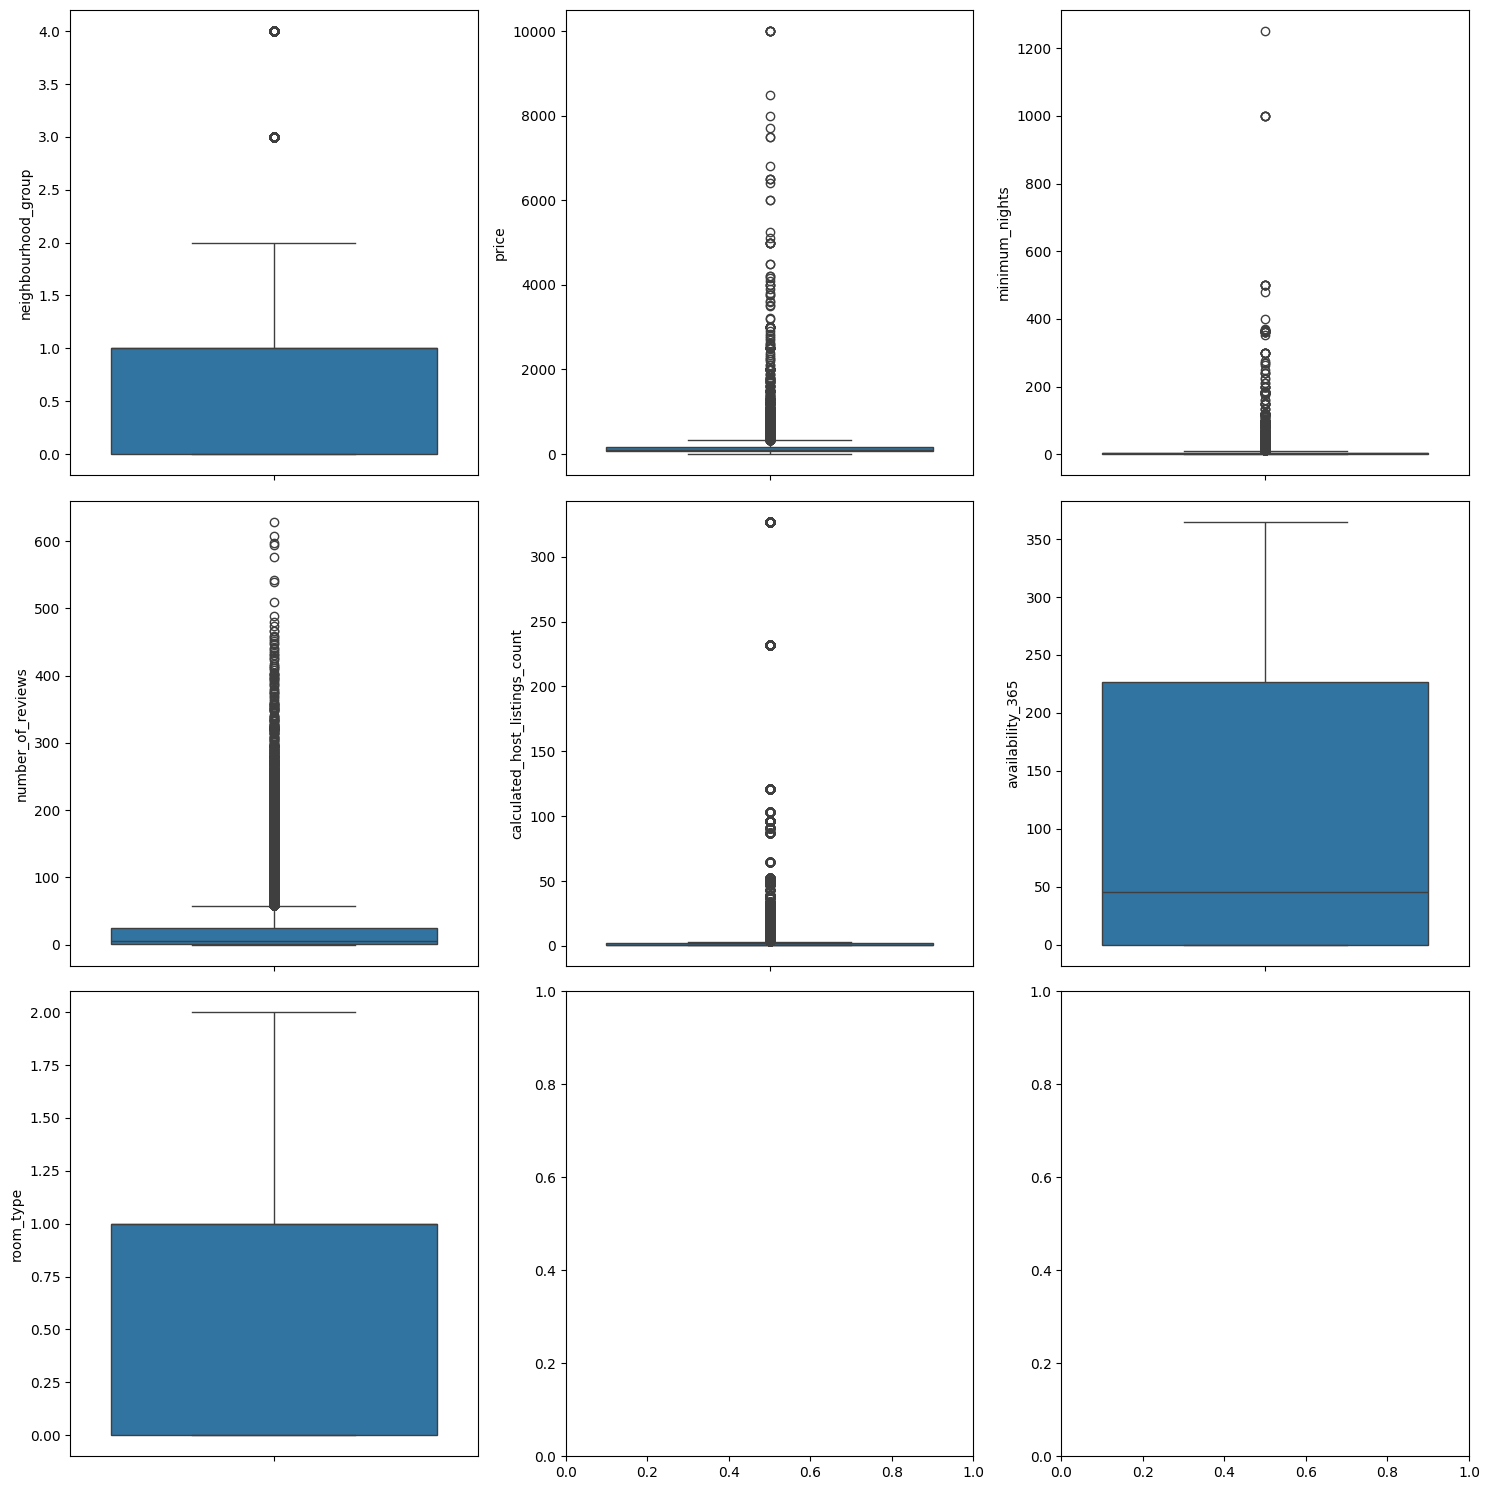

In [15]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data_total, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data_total, y = "price")
sns.boxplot(ax = axes[0, 2], data = data_total, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data_total, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data_total, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data_total, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data_total, y = "room_type")

plt.tight_layout()

plt.show()

##### Identificacion de los valores atipicos para la variable `price`

In [17]:
# Estadisticos (stats) para la variable Price
price_stats = data_total["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [26]:
# Rango intercuratilico (IQR) para la variable Price

price_iqr = price_stats["75%"] - price_stats["25%"]
limite_superior = price_stats["75%"] + 1.5 * price_iqr
limite_inferior = price_stats["25%"] - 1.5 * price_iqr

print(f"Los limites superior e inferior para encontrar valores atipicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartilico de {round(price_iqr, 2)}")



Los limites superior e inferior para encontrar valores atipicos son 334.0 y -90.0, con un rango intercuartilico de 106.0


In [19]:
# Limpieza de los datos atipicos

data_total = data_total[data_total["price"] > 0]

In [21]:
contador_0 = data_total[data_total["price"] == 0].shape[0]
contador_1 = data_total[data_total["price"] == 1].shape[0]

print("Contador de 0: ", contador_0)
print("Contador de 1: ", contador_1)

Contador de 0:  0
Contador de 1:  0


#### Identificacion de los valores atipicos de la variable `minimum_nights`

In [27]:
# Estadisticos (stats) para la variable minimum_nights
nights_stats = data_total["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [28]:
# Rango intercuratilico (IQR) para la variable minimum_nigths

nights_iqr = nights_stats["75%"] - nights_stats["25%"]

limite_superior = nights_stats["75%"] + 1.5 * nights_iqr
limite_inferior = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los limites superior e inferior para encontrar valores atipicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartilico de {round(nights_iqr, 2)}")


Los limites superior e inferior para encontrar valores atipicos son 11.0 y -5.0, con un rango intercuartilico de 4.0


In [29]:
# Limpieza de los datos atipicos

data_total = data_total[data_total["minimum_nights"] <= 15]

In [31]:
contador_0 = data_total[data_total["minimum_nights"] == 0].shape[0]
contador_1 = data_total[data_total["minimum_nights"] == 1].shape[0]
contador_2 = data_total[data_total["minimum_nights"] == 2].shape[0]
contador_3 = data_total[data_total["minimum_nights"] == 3].shape[0]
contador_4 = data_total[data_total["minimum_nights"] == 4].shape[0]


print("Contador de 0: ", contador_0)
print("Contador de 1: ", contador_1)
print("Contador de 2: ", contador_2)
print("Contador de 3: ", contador_3)
print("Contador de 4: ", contador_4)

Contador de 0:  0
Contador de 1:  12717
Contador de 2:  11693
Contador de 3:  7998
Contador de 4:  3302


##### Identificacion de los valores atipicos para la variable `number_of_reviews`

In [32]:
# Estadisticas (stats) para la variable number_of_reviews

review_stats = data_total["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [33]:
# Rango intercuratilico (IQR) para la variable number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

limite_superior = review_stats["75%"] + 1.5 * review_iqr
limite_inferior = review_stats["25%"] - 1.5 * review_iqr

print(f"Los limites superior e inferior para encontrar valores atipicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartilico de {round(review_iqr, 2)}")


Los limites superior e inferior para encontrar valores atipicos son 66.0 y -38.0, con un rango intercuartilico de 26.0


##### Identificacion de valores atípicos para lña variable `calculated_host_listings_count`

In [35]:
# Estadisticos (stats) de la variable calculated_host_listings_count

hostlist_stats = data_total["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [36]:
# Rango intercuratilico (IQR) para la variable calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

limite_superior = hostlist_stats["75%"] + 1.5 * hostlist_iqr
limite_inferior = hostlist_stats["25%"] - 1.5 * hostlist_iqr


print(f"Los limites superior e inferior para encontrar valores atipicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartilico de {round(hostlist_iqr, 2)}")


Los limites superior e inferior para encontrar valores atipicos son 3.5 y -0.5, con un rango intercuartilico de 1.0


In [37]:
contador_0 = sum(1 for i in data_total["calculated_host_listings_count"] if i in range(0, 5))
contador_1 = data_total[data_total["calculated_host_listings_count"] == 1].shape[0]
contador_2 = data_total[data_total["calculated_host_listings_count"] == 2].shape[0]

print("Contador de 0: ", contador_0)
print("Contador de 1: ", contador_1)
print("Contador de 2: ", contador_2)

Contador de 0:  40308
Contador de 1:  30253
Contador de 2:  6179


In [38]:
# Limpieza de valores atipicos

data_total = data_total[data_total["calculated_host_listings_count"] > 4]

#### Estudio de los valores faltantes `NaN`

In [40]:
# Veamos la cantidad de valores faltantes (NaN) en la data

data_total.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Escalamiento de las caracteristicas/funciones

In [41]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_total[num_variables])
df_scal = pd.DataFrame(scal_features, index = data_total.index, columns = num_variables)
df_scal["price"] = data_total["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


### Paso 6: Seleccion de las caracteristicas/funciones

In [42]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


#### Guardamos los datos limpios y sin procesar por los momentos

In [43]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)